In [2]:
pip install prophet

  Attempting uninstall: wheel
    Found existing installation: wheel 0.35.1
    Uninstalling wheel-0.35.1:
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\user\\anaconda3\\Lib\\site-packages\\~heel-0.35.1-py3.6.egg-info'
Consider using the `--user` option or check the permissions.



In [19]:
import pandas as pd
import numpy as np
import os

from prophet import Prophet
import holidays

import matplotlib.pyplot as plt

In [25]:
#files = os.listdir("cycling_Auckland")
#files = [v for v in files if 'count' in v]


In [26]:
#files

In [27]:
# google searches: Multiple files pandas concat
# Python aggrgate timestamp per day

#data_list = []
#for file in files:
    #current_file = pd.read_csv(os.path.join("cycling_Auckland", file))
    #data_list.append(current_file[['datetime', 'Tamaki Drive EB']])

#Tamaki = pd.concat(data_list) 
#Tamaki = Tamaki.reset_index(drop = True)
#Tamaki['datetime'] = pd.to_datetime(Tamaki['datetime'])
#Tamaki = Tamaki.sort_values(by = 'datetime')
#Tamaki

In [23]:
Tamaki = pd.read_csv("cycling_Auckland/cycling_counts_by_day.txt")
Tamaki = Tamaki.reset_index(drop = True)
Tamaki['datetime'] = pd.to_datetime(Tamaki['datetime'])
Tamaki = Tamaki.sort_values(by = 'datetime')
Tamaki

,datetime,Tamaki Drive EB
0,2010-07-01,570.0
1,2010-07-02,473.0
2,2010-07-03,766.0
3,2010-07-04,240.0
4,2010-07-05,172.0
...,...,...
2887,2018-05-27,235.0
2888,2018-05-28,709.0
2889,2018-05-29,859.0
2890,2018-05-30,787.0


In [24]:
Tamaki.columns = ['ds', 'y']
Tamaki = Tamaki[Tamaki['ds'] >= "2016"].reset_index(drop = True)
Tamaki

,ds,y
0,2016-01-01,349.0
1,2016-01-02,126.0
2,2016-01-03,674.0
3,2016-01-04,887.0
4,2016-01-05,848.0
...,...,...
877,2018-05-27,235.0
878,2018-05-28,709.0
879,2018-05-29,859.0
880,2018-05-30,787.0


In [35]:
Tamaki_train = Tamaki[Tamaki['ds'] < '2018-05-01']
Tamaki_test = Tamaki[Tamaki['ds'] >= '2018-05-01']
print(Tamaki_train.tail())
print(Tamaki_test.head())

            ds      y
846 2018-04-26  925.0
847 2018-04-27  786.0
848 2018-04-28  127.0
849 2018-04-29  569.0
850 2018-04-30  774.0
            ds       y
851 2018-05-01   933.0
852 2018-05-02   983.0
853 2018-05-03  1009.0
854 2018-05-04   948.0
855 2018-05-05   864.0


In [36]:
m = Prophet(daily_seasonality = True, yearly_seasonality=True)
m.fit(Tamaki_train)

16:58:07 - cmdstanpy - INFO - Chain [1] start processing
16:58:07 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
Tamaki_test.shape

(31, 2)

In [39]:
forecast_hours = Tamaki_test.shape[0]
future = m.make_future_dataframe(periods=forecast_hours, freq='H')
future

,ds
0,2016-01-01 00:00:00
1,2016-01-02 00:00:00
2,2016-01-03 00:00:00
3,2016-01-04 00:00:00
4,2016-01-05 00:00:00
...,...
877,2018-05-01 03:00:00
878,2018-05-01 04:00:00
879,2018-05-01 05:00:00
880,2018-05-01 06:00:00


In [40]:
future.ds.unique()

array(['2016-01-01T00:00:00.000000000', '2016-01-02T00:00:00.000000000',
       '2016-01-03T00:00:00.000000000', '2016-01-04T00:00:00.000000000',
       '2016-01-05T00:00:00.000000000', '2016-01-06T00:00:00.000000000',
       '2016-01-07T00:00:00.000000000', '2016-01-08T00:00:00.000000000',
       '2016-01-09T00:00:00.000000000', '2016-01-10T00:00:00.000000000',
       '2016-01-11T00:00:00.000000000', '2016-01-12T00:00:00.000000000',
       '2016-01-13T00:00:00.000000000', '2016-01-14T00:00:00.000000000',
       '2016-01-15T00:00:00.000000000', '2016-01-16T00:00:00.000000000',
       '2016-01-17T00:00:00.000000000', '2016-01-18T00:00:00.000000000',
       '2016-01-19T00:00:00.000000000', '2016-01-20T00:00:00.000000000',
       '2016-01-21T00:00:00.000000000', '2016-01-22T00:00:00.000000000',
       '2016-01-23T00:00:00.000000000', '2016-01-24T00:00:00.000000000',
       '2016-01-25T00:00:00.000000000', '2016-01-26T00:00:00.000000000',
       '2016-01-27T00:00:00.000000000', '2016-01-28

In [44]:
forecast = m.predict(future)
#forecast['truth'] = Tamaki['y']
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01 00:00:00,423.608640,342.892648,898.317276,423.608640,423.608640,208.380305,208.380305,208.380305,2.992138e+02,...,-57.292985,-57.292985,-57.292985,-33.540533,-33.540533,-33.540533,0.0,0.0,0.0,631.988945
1,2016-01-02 00:00:00,423.721098,337.037256,922.518618,423.721098,423.721098,204.343805,204.343805,204.343805,2.992138e+02,...,-71.963169,-71.963169,-71.963169,-22.906851,-22.906851,-22.906851,0.0,0.0,0.0,628.064903
2,2016-01-03 00:00:00,423.833557,445.501573,999.372302,423.833557,423.833557,294.271393,294.271393,294.271393,2.992138e+02,...,5.497378,5.497378,5.497378,-10.439809,-10.439809,-10.439809,0.0,0.0,0.0,718.104950
3,2016-01-04 00:00:00,423.946015,468.755820,1012.410214,423.946015,423.946015,324.876623,324.876623,324.876623,2.992138e+02,...,22.031911,22.031911,22.031911,3.630888,3.630888,3.630888,0.0,0.0,0.0,748.822638
4,2016-01-05 00:00:00,424.058474,575.474274,1129.983769,424.058474,424.058474,422.877195,422.877195,422.877195,2.992138e+02,...,104.614683,104.614683,104.614683,19.048688,19.048688,19.048688,0.0,0.0,0.0,846.935669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,2018-05-01 03:00:00,517.950142,348.108355,882.808655,517.950142,517.950142,94.972795,94.972795,94.972795,-7.480346e+01,...,102.457320,102.457320,102.457320,67.318932,67.318932,67.318932,0.0,0.0,0.0,612.922938
878,2018-05-01 04:00:00,517.954510,307.614993,849.188183,517.954510,517.954510,55.837168,55.837168,55.837168,-1.122052e+02,...,100.734924,100.734924,100.734924,67.307428,67.307428,67.307428,0.0,0.0,0.0,573.791678
879,2018-05-01 05:00:00,517.958877,374.072620,875.641362,517.958877,517.958877,104.907143,104.907143,104.907143,-6.091344e+01,...,98.526620,98.526620,98.526620,67.293961,67.293961,67.293961,0.0,0.0,0.0,622.866020
880,2018-05-01 06:00:00,517.963244,399.644581,932.375676,517.963244,517.963244,163.127769,163.127769,163.127769,-6.918605e-08,...,95.849244,95.849244,95.849244,67.278524,67.278524,67.278524,0.0,0.0,0.0,681.091012


In [45]:
forecast['truth'] = Tamaki['y']
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,truth
0,2016-01-01 00:00:00,423.608640,342.892648,898.317276,423.608640,423.608640,208.380305,208.380305,208.380305,2.992138e+02,...,-57.292985,-57.292985,-33.540533,-33.540533,-33.540533,0.0,0.0,0.0,631.988945,349.0
1,2016-01-02 00:00:00,423.721098,337.037256,922.518618,423.721098,423.721098,204.343805,204.343805,204.343805,2.992138e+02,...,-71.963169,-71.963169,-22.906851,-22.906851,-22.906851,0.0,0.0,0.0,628.064903,126.0
2,2016-01-03 00:00:00,423.833557,445.501573,999.372302,423.833557,423.833557,294.271393,294.271393,294.271393,2.992138e+02,...,5.497378,5.497378,-10.439809,-10.439809,-10.439809,0.0,0.0,0.0,718.104950,674.0
3,2016-01-04 00:00:00,423.946015,468.755820,1012.410214,423.946015,423.946015,324.876623,324.876623,324.876623,2.992138e+02,...,22.031911,22.031911,3.630888,3.630888,3.630888,0.0,0.0,0.0,748.822638,887.0
4,2016-01-05 00:00:00,424.058474,575.474274,1129.983769,424.058474,424.058474,422.877195,422.877195,422.877195,2.992138e+02,...,104.614683,104.614683,19.048688,19.048688,19.048688,0.0,0.0,0.0,846.935669,848.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,2018-05-01 03:00:00,517.950142,348.108355,882.808655,517.950142,517.950142,94.972795,94.972795,94.972795,-7.480346e+01,...,102.457320,102.457320,67.318932,67.318932,67.318932,0.0,0.0,0.0,612.922938,235.0
878,2018-05-01 04:00:00,517.954510,307.614993,849.188183,517.954510,517.954510,55.837168,55.837168,55.837168,-1.122052e+02,...,100.734924,100.734924,67.307428,67.307428,67.307428,0.0,0.0,0.0,573.791678,709.0
879,2018-05-01 05:00:00,517.958877,374.072620,875.641362,517.958877,517.958877,104.907143,104.907143,104.907143,-6.091344e+01,...,98.526620,98.526620,67.293961,67.293961,67.293961,0.0,0.0,0.0,622.866020,859.0
880,2018-05-01 06:00:00,517.963244,399.644581,932.375676,517.963244,517.963244,163.127769,163.127769,163.127769,-6.918605e-08,...,95.849244,95.849244,67.278524,67.278524,67.278524,0.0,0.0,0.0,681.091012,787.0


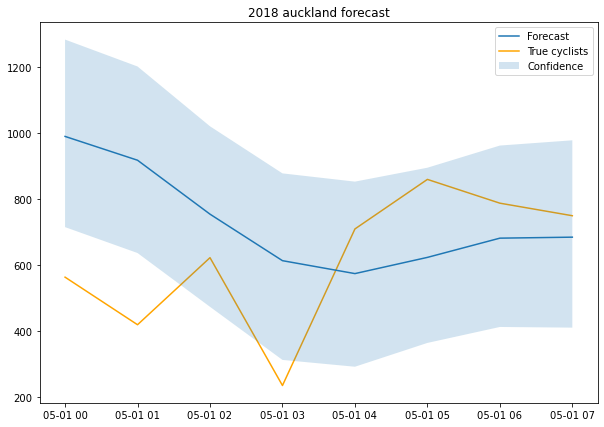

In [42]:
forecast_plot = forecast[np.logical_and(forecast['ds'] >= '2018-05-01', forecast['ds'] <= '2018-05-10' )]

plt.figure(figsize = (10,7))
plt.plot(forecast_plot['ds'], forecast_plot['yhat'], label='Forecast', zorder = 1)
plt.plot(forecast_plot['ds'], forecast_plot['truth'], label='True cyclists', zorder = 0, color = 'orange')                                                                                       
plt.fill_between(forecast_plot['ds'], forecast_plot['yhat_upper'], forecast_plot['yhat_lower'],
                 alpha=.2, label='Confidence')
plt.title('2018 auckland forecast')
plt.legend()
plt.show()

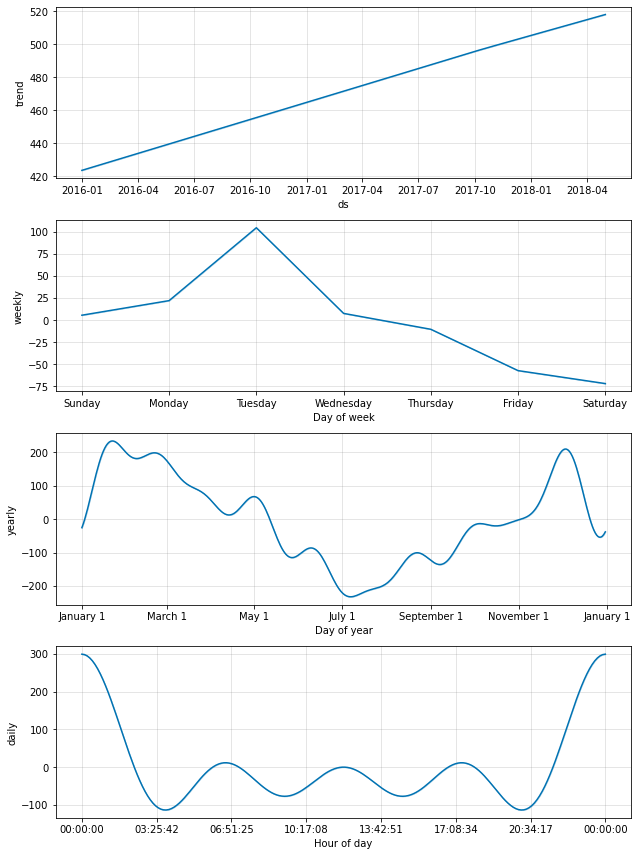

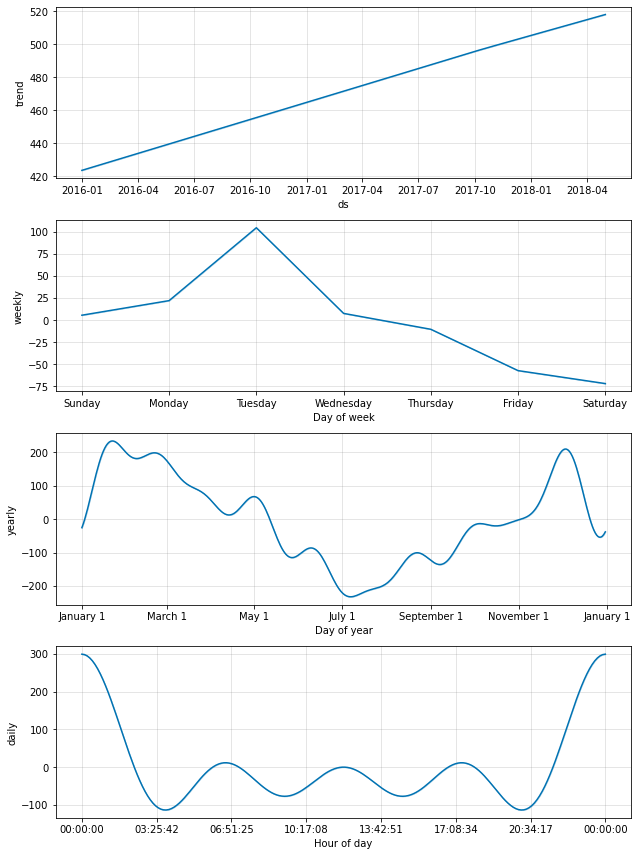

In [43]:
m.plot_components(forecast)